<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Algoritmo-Gen-tico-DEAP/blob/main/Algoritmo_Gen%C3%A9tico_DEAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
# FAZER A INSTALAÇÃO DA BIBLIOTECA
!pip install deap

In [289]:
# IMPORTAR AS BIBLIOTECAS BÁSICAS
import numpy as np
import matplotlib.pyplot as plt

# IMPORTAR AS BIBLIOTECAS DE MACHINE LEARNING
from deap import creator
from deap import base
from deap import tools
from deap import algorithms

In [290]:
# REGISTRO
# 'toolbox' = FERRAMENTA, ONDE SERÁ REGISTRADO OS OBJETIVOS E ELEMENTOS DO ALGORITMO GENÉTICO
toolbox = base.Toolbox()

# NÚMEROS DE GENES
n = 4

# CRIAÇÃO DA APTIDÃO DE MINIMIZAÇÃO, MAXIMIZAÇÃO, E MÚLTIPLOS OBJETIVOS 
# OBS: 'WEIGHT' É O PESO QUE SERÁ USADO, E O PESO É LIDO EM PORCENTAGEM
creator.create('FitnessMin', base.Fitness,weights=(-1.0,))

# CRIAÇÃO DOS CROMOSSOMOS, DEFINO COMO OS INDIVÍDUOS VÃO SER REPRESENTADOS 
# DEFINO COMO 'LISTA' E CADA LISTA REPRESENTA UM GENE
creator.create('EstruturaIndividuo',list, fitness = creator.FitnessMin)

# PERMUTAÇÃO DOS ELEMENTOS
# REGISTRO DO NÚMERO DE GENES
toolbox.register('Genes', np.random.permutation, n)

# REGISTRO DE INDIVÍDUOS
# REGISTRAR OS CROMOSSOMOS DOS INDIVÍDUOS
toolbox.register('Individuos', tools.initIterate, creator.EstruturaIndividuo, toolbox.Genes)

# REGISTRO DA POPULAÇÃO
# SERÁ UMA LISTA DE INDIVÍDUOS
toolbox.register('Populaçao', tools.initRepeat, list, toolbox.Individuos)

# NÚMERO DE POPULAÇÃO
pop = toolbox.Populaçao (n=10)

# REGISTRO DE OPERADORES
# TIPOS: CROSSOVER, MUTATION, E SELECTION

toolbox.register('mate', tools.cxPartialyMatched)
# REALIZA TROCAS NO SENTIDO DE PAI1 PARA PAI2 E DEPOIS NO SENTIDO INVERSO, DE PAI 2 PARA PAI1, PARA EVITAR CROMOSSOMOS INVÁLIDOS
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.1)
# TROCA O ELEMENTO DA POSIÇÃO i COM O ELEMENTOS DA POSIÇÃO j, PROBABILIDADE DE MUTAÇÃO DO GENE DEFINI COMO 10%
toolbox.register('select', tools.selTournament, tournsize = 2)
# SELEÇÃO POR TORNEIO 

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'EstruturaIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [291]:
# MATRIX ORIGEM DESTINO
dist = [[0, 7, 9, 2],
        [4, 0, 3, 7],
        [6, 7, 0, 8],
        [2, 3, 8, 0]]

In [292]:
# FUNÇÃO DE APTIDÃO
def aptidao (Individuos):
  f = 0
  for i in range (n-1):
    local1 = Individuos[i]
    local2 = Individuos[i + 1]
    distancia = dist[local1][local2]
    f = f + distancia

  return f,
# IMPORTÂNCIA DA VÍRGULA: TEMOS QUE RETORNAR UMA APTIDÃO MULTI OBJETIVO

In [293]:
# REGISTRO DA EVOLUÇÃO DA APTIDÃO DE CADA INDIVÍDUO A CADA GERAÇÃO
toolbox.register('evaluate', aptidao)

In [294]:
# SALVAR OS MELHORES INDIVÍDUOS E APTIDÃO A CADA GERAÇÃO
# SALVAR ATRAVÉS DO MÓDULO DE ESTATÍSTICA
def EstatisticaSalvar (Individuos):
  return Individuos.fitness.values

In [295]:
# REGISTRAR A ESTATÍSTICA A SER SALVA
# SALVAR A ESTATÍSTICA DA MÉDIA, MÍNIMA E MÁXIMA DE CADA INDIVÍDUO
estatistica = tools.Statistics (EstatisticaSalvar)
estatistica.register ('mean', np.mean)
estatistica.register ('min', np.min)
estatistica.register ('max', np.max)

In [296]:
# DEFINIR QUANTOS VALORES ÓTIMOS DEVO SALVAR NA LISTA
# OU EM OUTRAS PALAVRAS, QUANTOS DOS MELHORES O ALGORITMO DEVE SALVAR
geraçao = tools.HallOfFame(1)

In [297]:
# EXECUTAR O ALGORITMO GENÉTICO
# pop = POPULAÇÃO / toolbox = toolbox / cxpb = PROBABILIDADE DE CROSSOVER / mutpb = PROBABILIDADE DE MUTAÇÃO
# stats = ESTATÍSTICA / ngen = NÚMERO DE GERAÇÕES / halloffame = halloffame / verbose = IMPRIMIR RESULTADO AO LONGO DA EXECUÇÃO
result, log = algorithms.eaSimple (pop, 
                                  toolbox,
                                  cxpb= 0.8, 
                                  mutpb= 0.1,
                                  stats=estatistica,
                                  ngen= 1000,
                                  halloffame=geraçao, 
                                  verbose=True)

gen	nevals	mean	min	max
0  	10    	14.7	8  	22 
1  	8     	14.7	8  	21 
2  	10    	17.4	14 	22 
3  	8     	16  	11 	20 
4  	6     	15.7	11 	20 
5  	8     	13.8	11 	20 
6  	6     	14  	11 	17 
7  	6     	13.2	11 	17 
8  	8     	11.3	11 	14 
9  	4     	11.9	11 	20 
10 	6     	11  	11 	11 
11 	10    	11  	11 	11 
12 	10    	11.9	11 	20 
13 	8     	11  	11 	11 
14 	10    	11  	11 	11 
15 	10    	11  	11 	11 
16 	6     	11.9	11 	20 
17 	8     	11  	11 	11 
18 	10    	11.3	11 	14 
19 	8     	11  	11 	11 
20 	10    	11  	11 	11 
21 	6     	11  	11 	11 
22 	6     	11  	11 	11 
23 	10    	11  	11 	11 
24 	8     	12.8	11 	20 
25 	8     	11.7	11 	18 
26 	7     	11  	11 	11 
27 	10    	11.5	11 	16 
28 	10    	11.5	11 	16 
29 	10    	11.9	11 	20 
30 	7     	12.3	11 	20 
31 	8     	11.5	11 	16 
32 	10    	11  	11 	11 
33 	10    	11  	11 	11 
34 	8     	11  	11 	11 
35 	8     	11  	11 	11 
36 	6     	11  	11 	11 
37 	10    	11  	11 	11 
38 	6     	11  	11 	11 
39 	6     	12.4	11 	23 
40 	8     	11  	

In [298]:
# MOSTRAR O RESULTADO DAS MELHORES POPULAÇÕES
print(result)

[[2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 1, 3], [2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 3, 1], [2, 0, 3, 1]]


In [299]:
# MOSTRAR O MELHOR INDIVÍDUO
print(geraçao)

[[0, 3, 1, 2]]


In [300]:
# MOSTRAR A MELHOR APTIDÃO
melhor = geraçao[0]
print(melhor)
aptidao(melhor)

[0, 3, 1, 2]


(8,)

In [301]:
# MOSTRAR O LOG A CADA GERAÇÃO
log

[{'gen': 0, 'max': 22.0, 'mean': 14.7, 'min': 8.0, 'nevals': 10},
 {'gen': 1, 'max': 21.0, 'mean': 14.7, 'min': 8.0, 'nevals': 8},
 {'gen': 2, 'max': 22.0, 'mean': 17.4, 'min': 14.0, 'nevals': 10},
 {'gen': 3, 'max': 20.0, 'mean': 16.0, 'min': 11.0, 'nevals': 8},
 {'gen': 4, 'max': 20.0, 'mean': 15.7, 'min': 11.0, 'nevals': 6},
 {'gen': 5, 'max': 20.0, 'mean': 13.8, 'min': 11.0, 'nevals': 8},
 {'gen': 6, 'max': 17.0, 'mean': 14.0, 'min': 11.0, 'nevals': 6},
 {'gen': 7, 'max': 17.0, 'mean': 13.2, 'min': 11.0, 'nevals': 6},
 {'gen': 8, 'max': 14.0, 'mean': 11.3, 'min': 11.0, 'nevals': 8},
 {'gen': 9, 'max': 20.0, 'mean': 11.9, 'min': 11.0, 'nevals': 4},
 {'gen': 10, 'max': 11.0, 'mean': 11.0, 'min': 11.0, 'nevals': 6},
 {'gen': 11, 'max': 11.0, 'mean': 11.0, 'min': 11.0, 'nevals': 10},
 {'gen': 12, 'max': 20.0, 'mean': 11.9, 'min': 11.0, 'nevals': 10},
 {'gen': 13, 'max': 11.0, 'mean': 11.0, 'min': 11.0, 'nevals': 8},
 {'gen': 14, 'max': 11.0, 'mean': 11.0, 'min': 11.0, 'nevals': 10},
 {

In [302]:
# MOSTRAR O LOG DO MENOR, MAIOR E A MÉDIA DE CADA GERAÇÃO
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

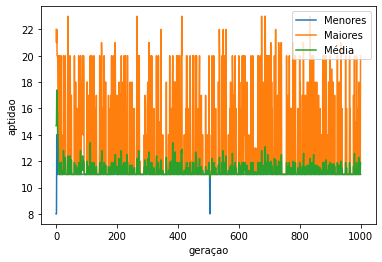

In [303]:
# MOSTRA GRÁFICO
# MOSTRAR O RESULTADO DE CADA GERAÇÃO
plt.plot(menores, label ='Menores')
plt.plot(maiores, label ='Maiores')
plt.plot(media, label ='Média')
plt.xlabel('geraçao')
plt.ylabel('aptidao')
plt.legend(loc=1)

In [304]:
# OBS: PARA OBTER RESULTADOS DIFERENTES DO MODELO E NECESSÁRIO AJUSTAR ALGUMAS VARIÁVEIS E PARAMETROS
# NÚMERO DE POPULAÇÃO, PROBABILIDADE DE CROSSOVER, PROBABILIDADE DE MUTAÇÃO, NÚMERO DE GERAÇÕES